In [1]:
import os
os.chdir("./..")

In [64]:
from pathlib import Path
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torch

In [5]:
from src.utils.models import load_pretrained_model
from src.utils.experiment_init import init_segmentation_model

In [12]:
model = init_segmentation_model(architecture="FSB_BTS_UNet__",
                                sequences=1,
                                width=24, 
                                deep_supervision=True,
                                save_folder=Path("."))
model = load_pretrained_model(model, "./runs/20231119_171415_FSB_BTS_UNet___24_batch_1_benign_malignant_normal/fold_0/model_20231119_171415_fold_0.tar")

In [49]:
# Directorio que contiene los datos de entrenamiento y validación
data_dir = './Datasets/Dataset_BUSI_with_GT_postprocessed_128_uniques/'

# Crear datasets para entrenamiento y validación
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.ToTensor(),          # Convertir las imágenes a tensores
])
data = datasets.ImageFolder(data_dir, transform=transform)

data_loader = DataLoader(data, batch_size=1, shuffle=False)

In [71]:
for n, patient in enumerate(data_loader):
    if n >=300:
        break
    seg_predicted = model(patient[0])[-1]
    segmentation = torch.sigmoid(seg_predicted) > 0.5
#     print(patient)

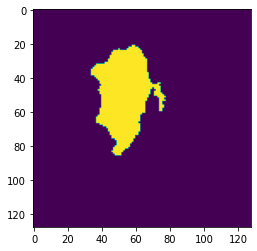

In [72]:
import matplotlib.pyplot as plt

plt.imshow(segmentation.detach().numpy()[0, 0, :, :])
plt.show()

In [61]:
seg_predicted[-1].detach().numpy()[0, 0, :, :]

(128, 128)